In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1') 
df 

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1029,Fallen Legion: Flames of Rebellion,NaN,Role-Playing,NaN,0.00,0.00,0.00,0.00,0.00
1030,Radial G Racing Revolved,2017.0,Racing,Tammeka Games,0.00,0.00,0.00,0.00,0.00
1031,The Mummy Demastered,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00
1032,Project Nimbus: Code Mirai,NaN,Action,NaN,0.00,0.00,0.00,0.00,0.00


# 1) Top 5 Best Selling PS4 Games globally.

In [6]:
top_5_games = df.nlargest(5, 'Global')
print(top_5_games[['Game', 'Global']])

                        Game  Global
0         Grand Theft Auto V   19.39
1  Call of Duty: Black Ops 3   15.09
2      Red Dead Redemption 2   13.94
3         Call of Duty: WWII   13.40
4                    FIFA 18   11.80


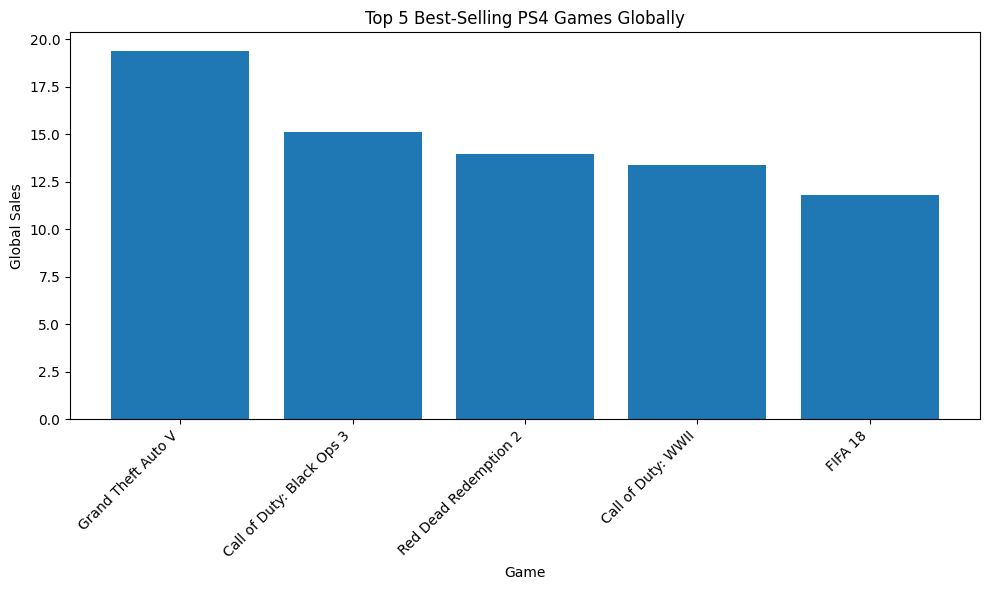

In [34]:
top_5_games = df.nlargest(5, 'Global')


plt.figure(figsize=(10, 6))
plt.bar(top_5_games['Game'], top_5_games['Global'])
plt.xlabel('Game')
plt.ylabel('Global Sales')
plt.title('Top 5 Best-Selling PS4 Games Globally')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

# 2) Regional Sales for each genre to understand market preferences.

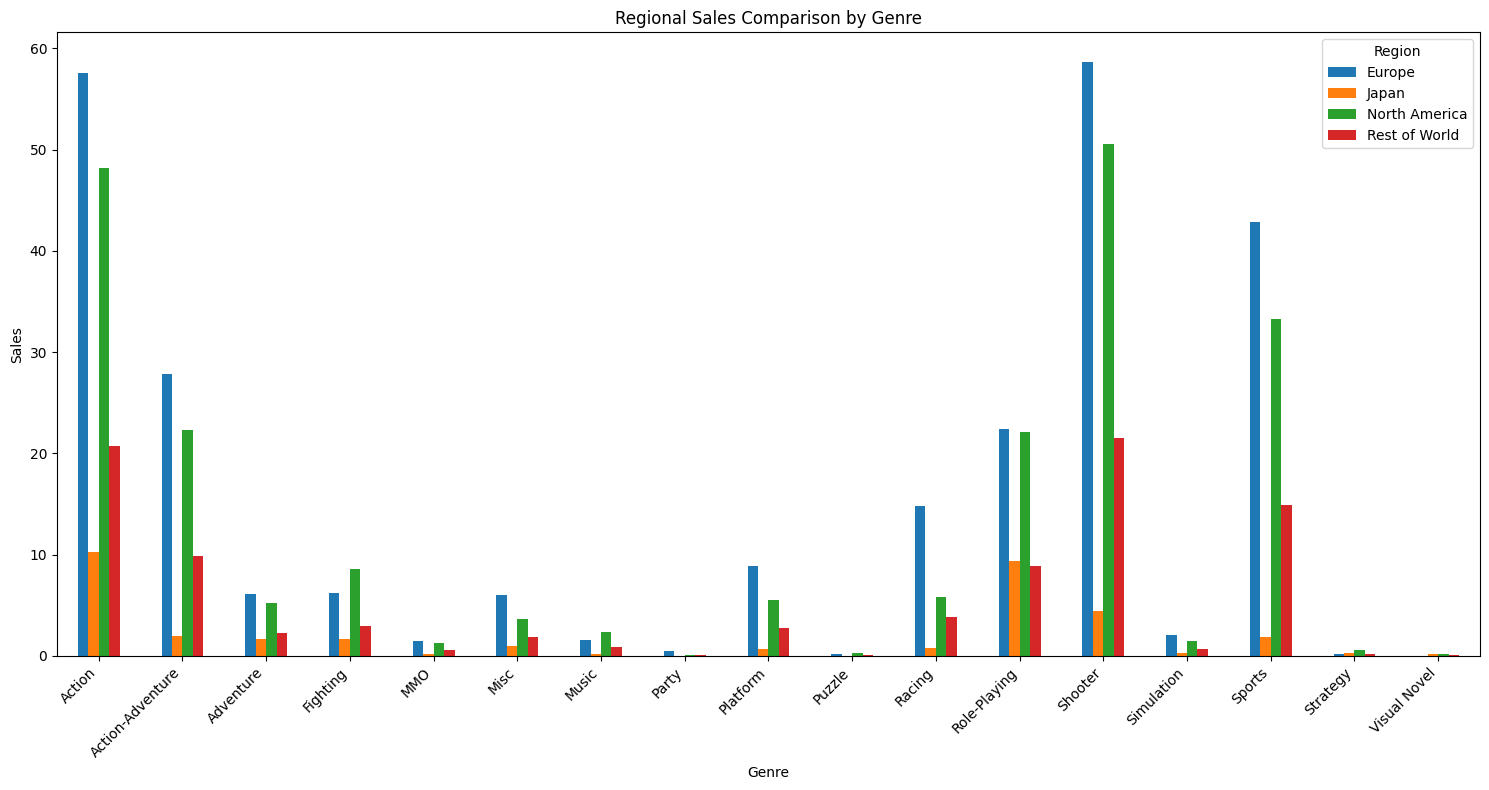

In [33]:
df = df.rename(columns={'NA_Sales': 'North America', 'EU_Sales': 'Europe', 'JP_Sales': 'Japan', 'Other_Sales': 'Rest of World'})


regional_sales = pd.melt(df, id_vars=['Genre'], value_vars=['North America', 'Europe', 'Japan', 'Rest of World'], var_name='Region', value_name='Sales')


regional_sales = regional_sales.groupby(['Genre', 'Region'])['Sales'].sum().unstack()



regional_sales.plot(kind='bar', figsize=(15, 8))
plt.title('Regional Sales Comparison by Genre')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region')
plt.tight_layout()
plt.show()

# 3) The publisher with the highest total global sales

The publisher with the highest total global sales is Activision with 72.44 million sales.


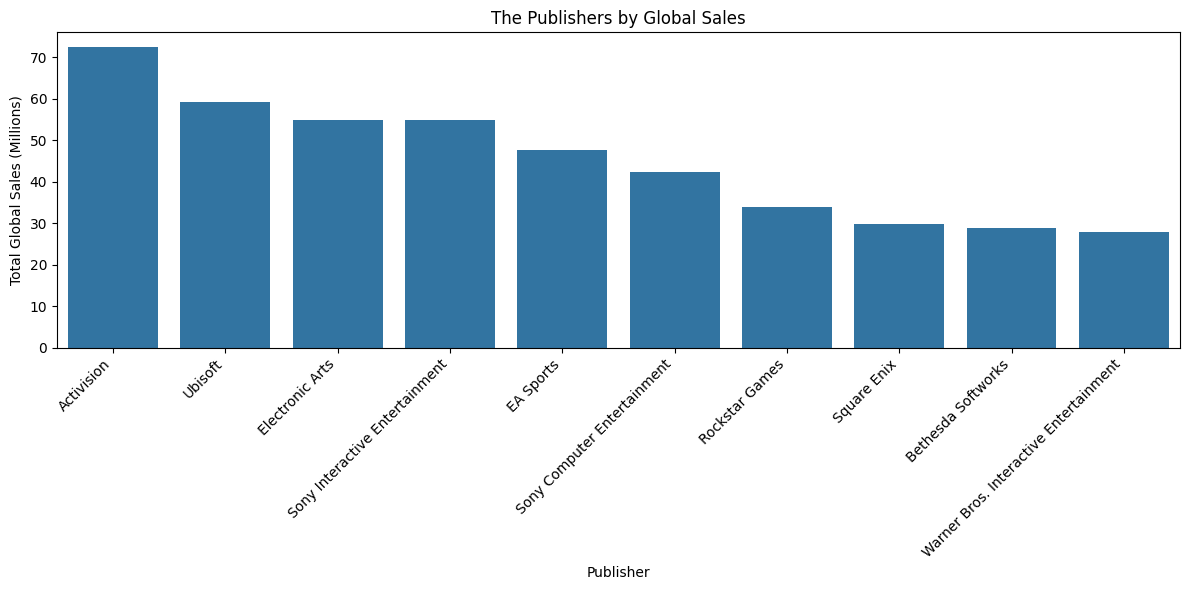

In [36]:
publisher_sales = df.groupby('Publisher')['Global'].sum()


top_publisher = publisher_sales.idxmax()
top_sales = publisher_sales.max()

print(f"The publisher with the highest total global sales is {top_publisher} with {top_sales} million sales.")


top_10_publishers = publisher_sales.nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_publishers.index, y=top_10_publishers.values)
plt.xlabel("Publisher")
plt.ylabel("Total Global Sales (Millions)")
plt.title("The Publishers by Global Sales")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4) The year with the highest number of game releases

The year with the highest number of game releases is 2017 with 254 releases.


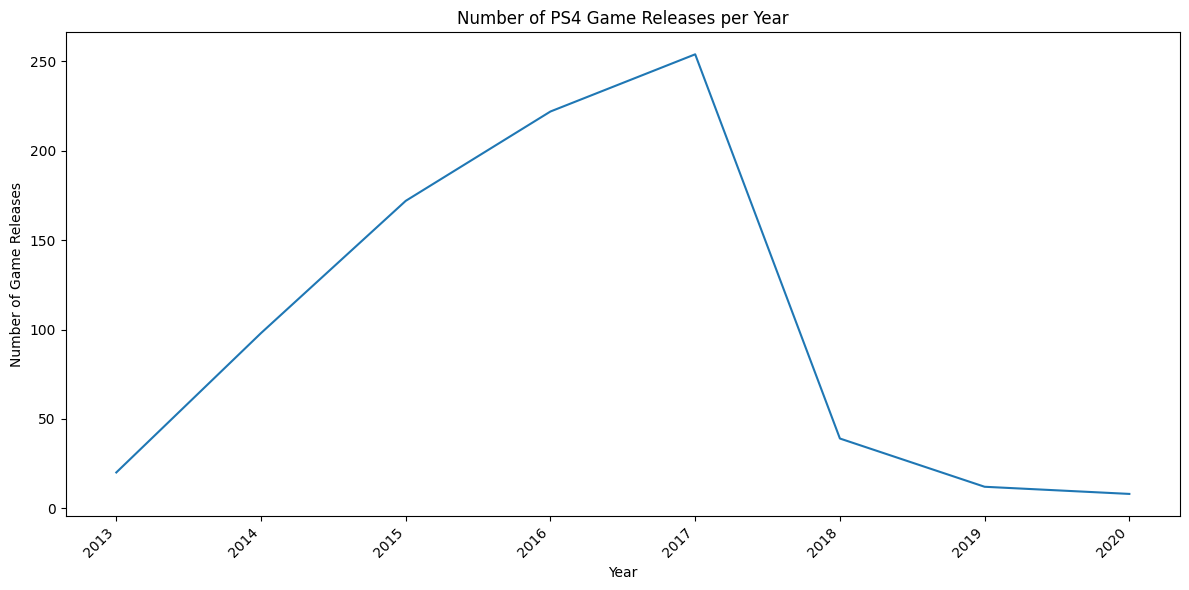

In [37]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

game_releases_per_year = df.groupby('Year')['Game'].count()


year_highest_releases = game_releases_per_year.idxmax()
num_releases = game_releases_per_year.max()

print(f"The year with the highest number of game releases is {int(year_highest_releases)} with {int(num_releases)} releases.")


plt.figure(figsize=(12, 6))
sns.lineplot(x=game_releases_per_year.index, y=game_releases_per_year.values)
plt.xlabel("Year")
plt.ylabel("Number of Game Releases")
plt.title("Number of PS4 Game Releases per Year")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5) The most popular genre globally based on total sales

The most popular genre globally is Action with total sales of 136.85 million.


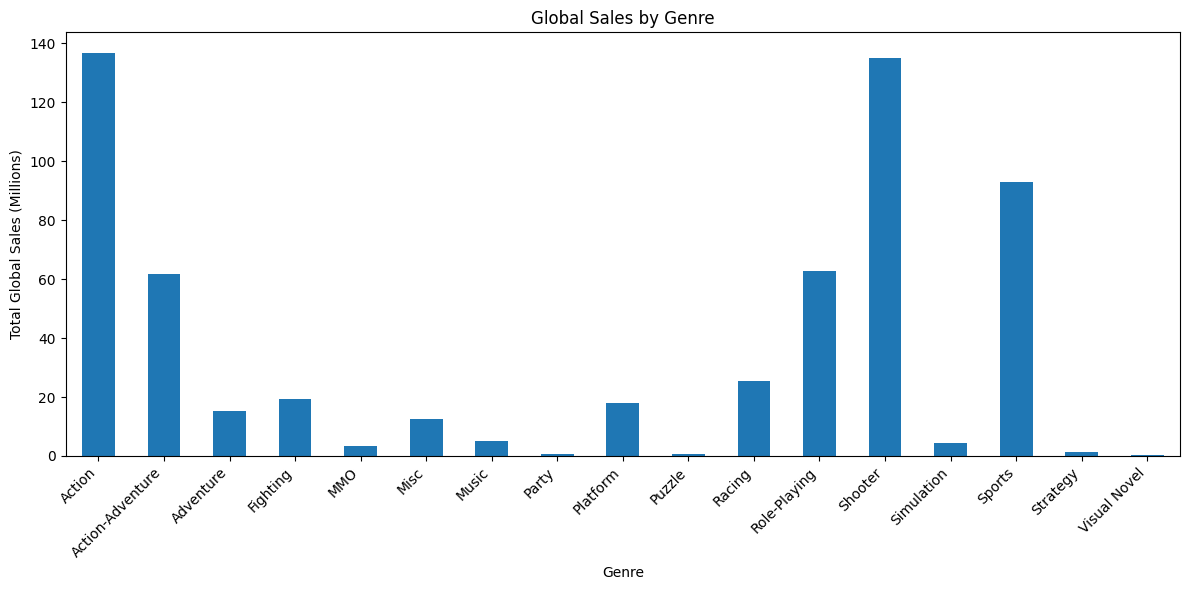

In [38]:
genre_sales = df.groupby('Genre')['Global'].sum()


most_popular_genre = genre_sales.idxmax()
highest_sales = genre_sales.max()

print(f"The most popular genre globally is {most_popular_genre} with total sales of {highest_sales} million.")


plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar')
plt.xlabel("Genre")
plt.ylabel("Total Global Sales (Millions)")
plt.title("Global Sales by Genre")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 6) The game with the highest sales in japan compared to other regions

Game with the highest sales in Japan compared to other regions: Jikkyou Powerful Pro Baseball 2016
Japan Sales Ratio: 100.00%


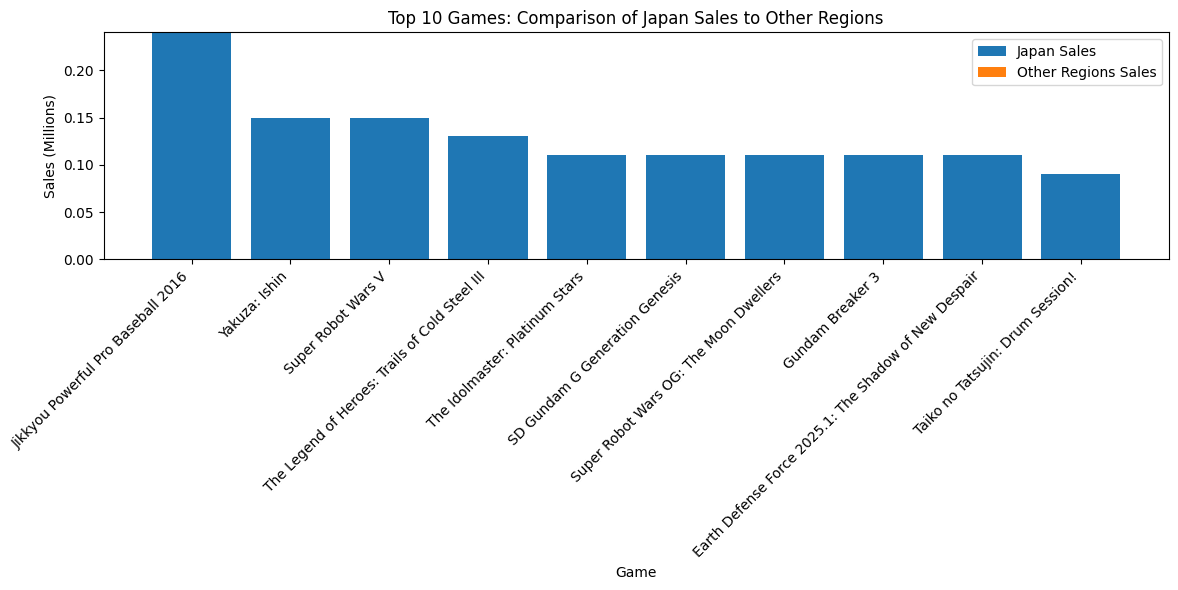

In [19]:
df['Japan_Ratio'] = df['Japan'] / (df['North America'] + df['Europe'] + df['Rest of World'] + df['Japan'])


game_highest_japan_ratio = df.loc[df['Japan_Ratio'].idxmax()]


print(f"Game with the highest sales in Japan compared to other regions: {game_highest_japan_ratio['Game']}")
print(f"Japan Sales Ratio: {game_highest_japan_ratio['Japan_Ratio']:.2%}")



top_10_japan_ratio = df.nlargest(10, 'Japan_Ratio')

plt.figure(figsize=(12, 6))
plt.bar(top_10_japan_ratio['Game'], top_10_japan_ratio['Japan'], label='Japan Sales')
plt.bar(top_10_japan_ratio['Game'], top_10_japan_ratio['North America'] + top_10_japan_ratio['Europe'] + top_10_japan_ratio['Rest of World'], bottom=top_10_japan_ratio['Japan'], label='Other Regions Sales')
plt.xlabel("Game")
plt.ylabel("Sales (Millions)")
plt.title("Top 10 Games: Comparison of Japan Sales to Other Regions")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# 7)  A correlation between sales in North America and Europe

The correlation between North America and Europe sales is: 0.8159968279353855


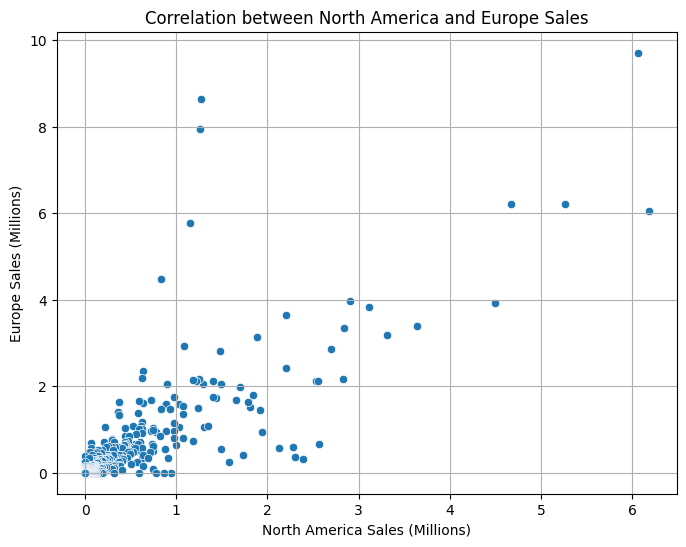

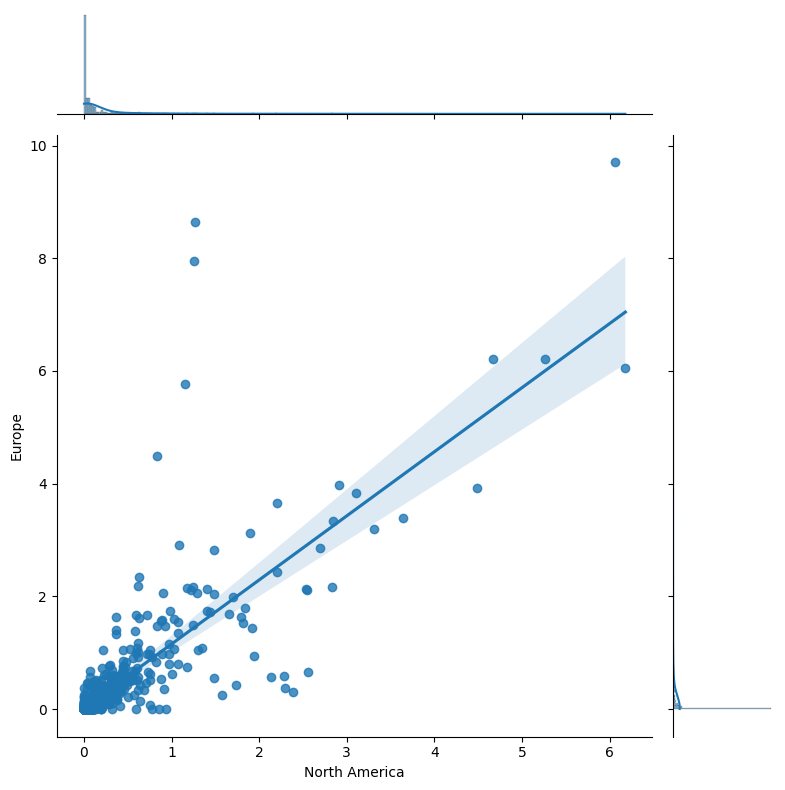

In [20]:
df = df.rename(columns={'NA_Sales': 'North America', 'EU_Sales': 'Europe', 'JP_Sales': 'Japan', 'Other_Sales': 'Rest of World'})


correlation = df['North America'].corr(df['Europe'])

print(f"The correlation between North America and Europe sales is: {correlation}")


plt.figure(figsize=(8, 6))
sns.scatterplot(x='North America', y='Europe', data=df)
plt.title('Correlation between North America and Europe Sales')
plt.xlabel('North America Sales (Millions)')
plt.ylabel('Europe Sales (Millions)')
plt.grid(True)
plt.show()


sns.jointplot(x='North America', y='Europe', data=df, kind='reg', height=8)
plt.show()

# 8) The sales growth trend for "Action" and "Shooter" genres over the years.

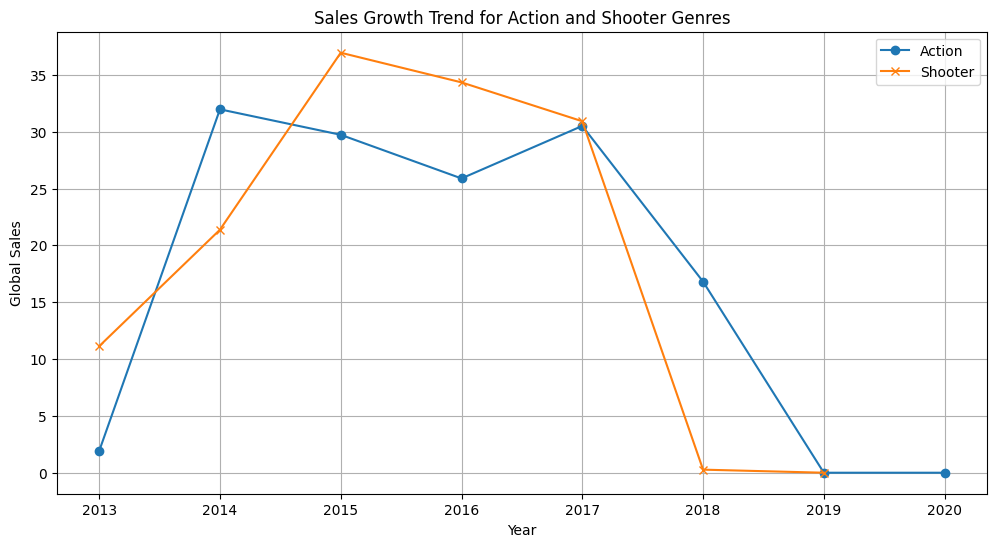

In [21]:
action_shooter_df = df[(df['Genre'] == 'Action') | (df['Genre'] == 'Shooter')]


sales_by_year_genre = action_shooter_df.groupby(['Year', 'Genre'])['Global'].sum().reset_index()


sales_pivot = sales_by_year_genre.pivot(index='Year', columns='Genre', values='Global')


plt.figure(figsize=(12, 6))
plt.plot(sales_pivot.index, sales_pivot['Action'], label='Action', marker='o')
plt.plot(sales_pivot.index, sales_pivot['Shooter'], label='Shooter', marker='x')

plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.title('Sales Growth Trend for Action and Shooter Genres')
plt.legend()
plt.grid(True)
plt.show()

# 9)  The Top publishers in terms of sales for each region

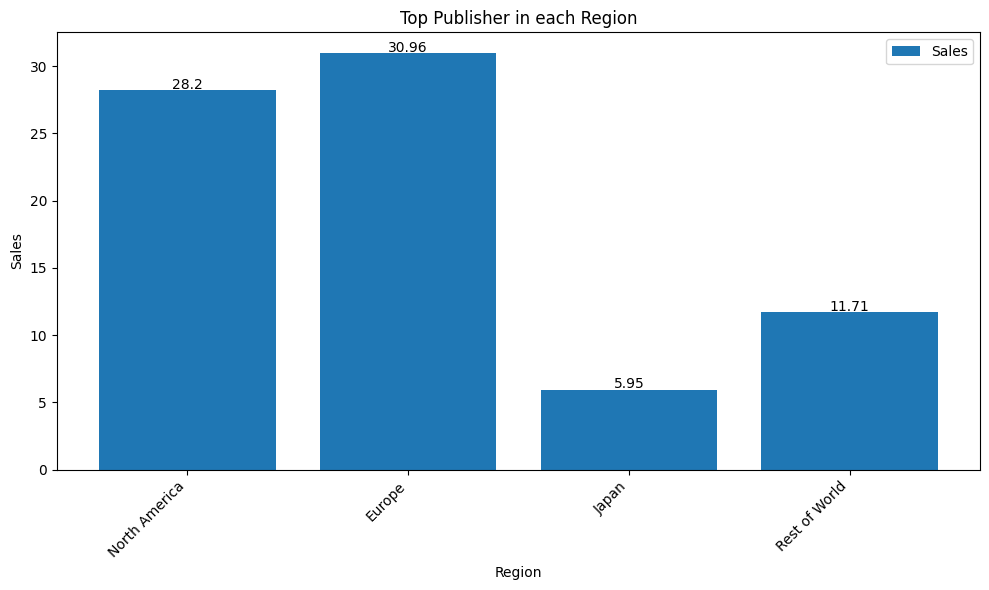

Top Publisher in North America: Activision
Top Publisher in Europe: Activision
Top Publisher in Japan: Square Enix
Top Publisher in Rest of World: Activision


In [39]:
df = df.rename(columns={'NA_Sales': 'North America', 'EU_Sales': 'Europe', 'JP_Sales': 'Japan', 'Other_Sales': 'Rest of World'})


def top_publisher_by_region(df, region):
    regional_sales = df.groupby('Publisher')[region].sum()
    top_publisher = regional_sales.idxmax()
    return top_publisher


top_publishers = {}
for region in ['North America', 'Europe', 'Japan', 'Rest of World']:
    top_publishers[region] = top_publisher_by_region(df, region)


regions = list(top_publishers.keys())
publishers = list(top_publishers.values())
plt.figure(figsize=(10, 6))
plt.bar(regions, [df[df['Publisher'] == p][regions[i]].sum() for i, p in enumerate(publishers)], label='Sales')


plt.xlabel("Region")
plt.ylabel("Sales")
plt.title("Top Publisher in each Region")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for i, v in enumerate([df[df['Publisher'] == p][regions[i]].sum() for i, p in enumerate(publishers)]):
    plt.text(i, v + 0.1, str(round(v,2)), ha='center') # Display sales values above the bars
plt.legend()
plt.show()


for region, publisher in top_publishers.items():
    print(f"Top Publisher in {region}: {publisher}")

# 10)  The distribution of global sales to identify patters and outliers

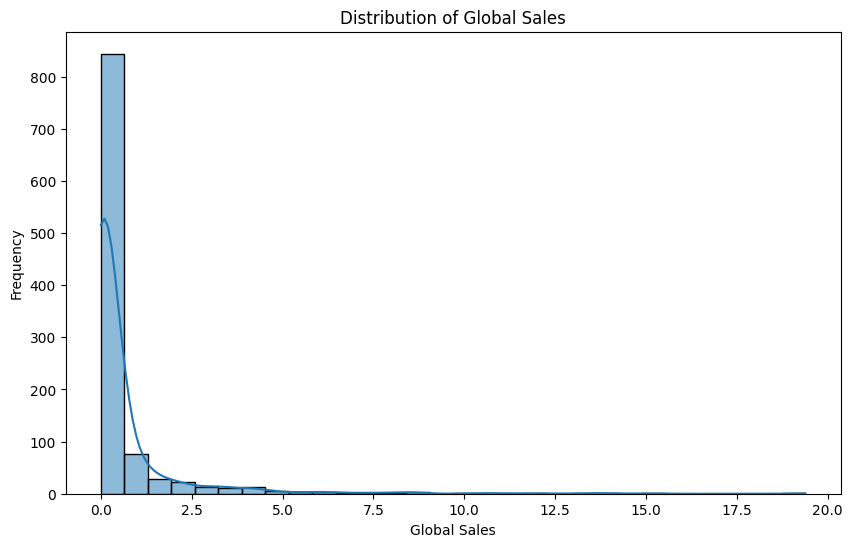

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Global'], bins=30, kde=True)
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales')
plt.ylabel('Frequency')
plt.show()

# 11) Visualizations to better understand and communication data insights

#  Distribution of global sales (histogram)

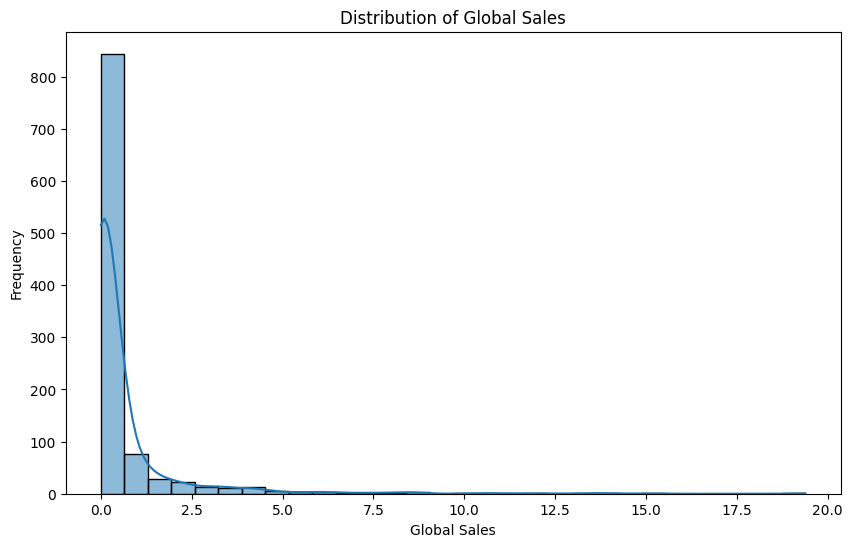

In [24]:
df = df.rename(columns={'NA_Sales': 'North America', 'EU_Sales': 'Europe', 'JP_Sales': 'Japan', 'Other_Sales': 'Rest of World'})

plt.figure(figsize=(10, 6))
sns.histplot(df['Global'], bins=30, kde=True)
plt.title('Distribution of Global Sales')
plt.xlabel('Global Sales')
plt.ylabel('Frequency')
plt.show()

# Total sales comparison for regions (Bar Chart)

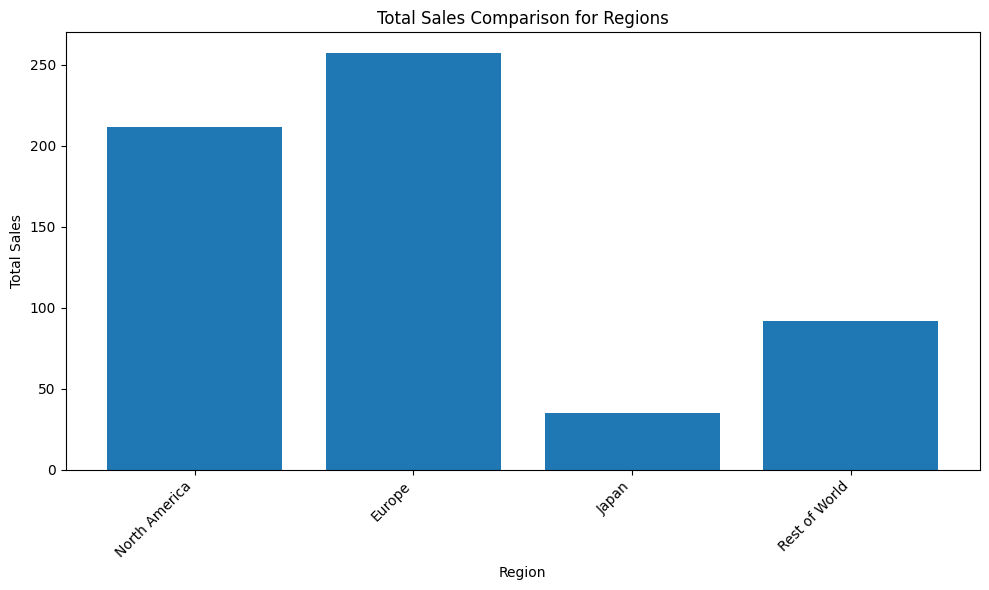

In [25]:
total_sales_by_region = {
    'North America': df['North America'].sum(),
    'Europe': df['Europe'].sum(),
    'Japan': df['Japan'].sum(),
    'Rest of World': df['Rest of World'].sum(),
}


regions = list(total_sales_by_region.keys())
sales = list(total_sales_by_region.values())

plt.figure(figsize=(10, 6))
plt.bar(regions, sales)
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.title("Total Sales Comparison for Regions")
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

# Share of total global sales by genre (pie chart)

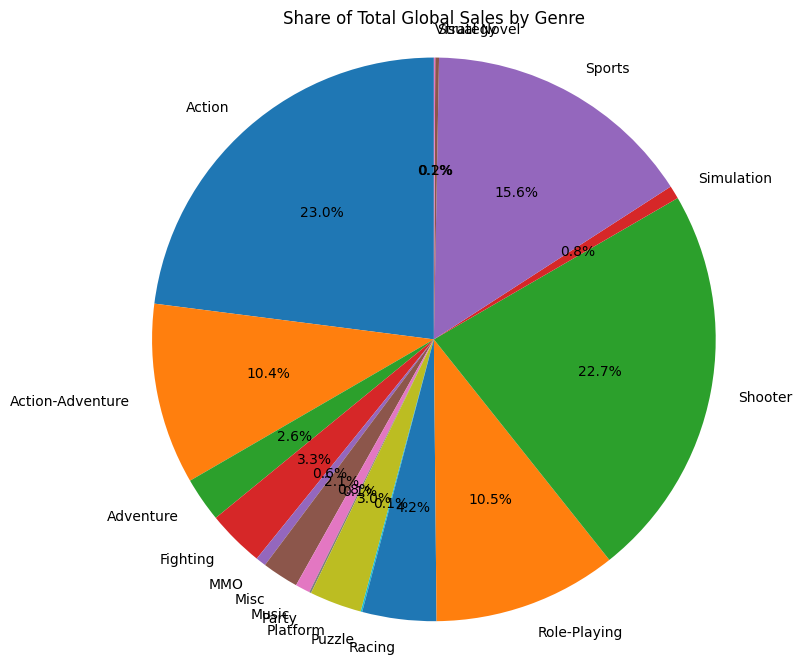

In [26]:
genre_sales = df.groupby('Genre')['Global'].sum()


plt.figure(figsize=(8, 8)) 
plt.pie(genre_sales, labels=genre_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Share of Total Global Sales by Genre')
plt.axis('equal')  
plt.show()

# Trend of global sales over the years (line chart)

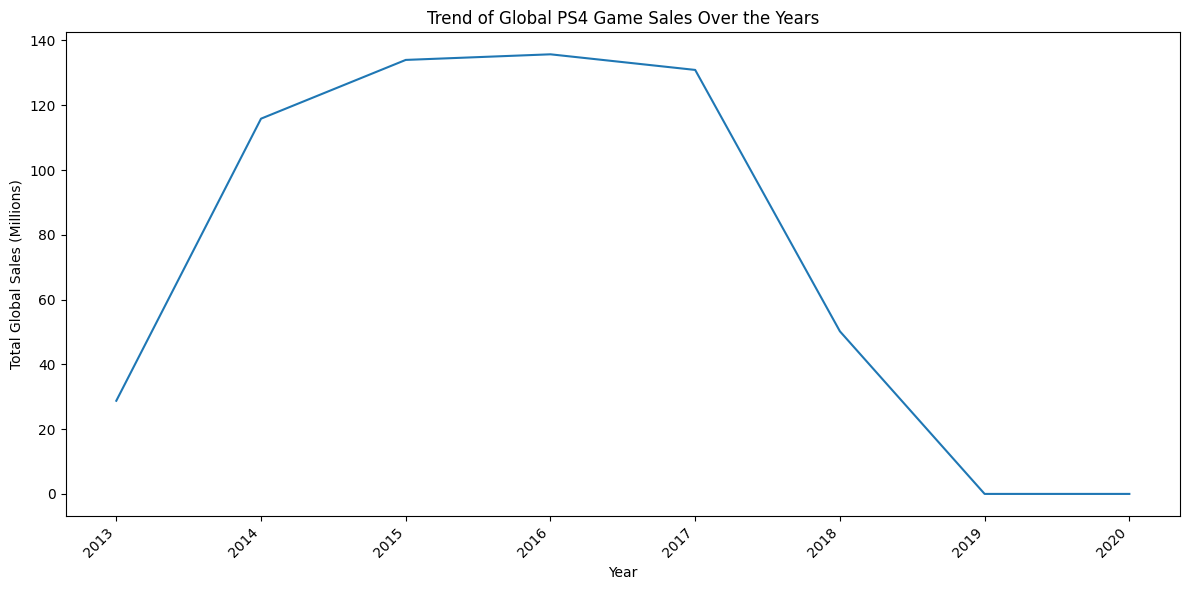

In [27]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')


global_sales_per_year = df.groupby('Year')['Global'].sum()


plt.figure(figsize=(12, 6))
sns.lineplot(x=global_sales_per_year.index, y=global_sales_per_year.values)
plt.xlabel("Year")
plt.ylabel("Total Global Sales (Millions)")
plt.title("Trend of Global PS4 Game Sales Over the Years")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Top 10 best-selling games globally (horizontal bar chart)

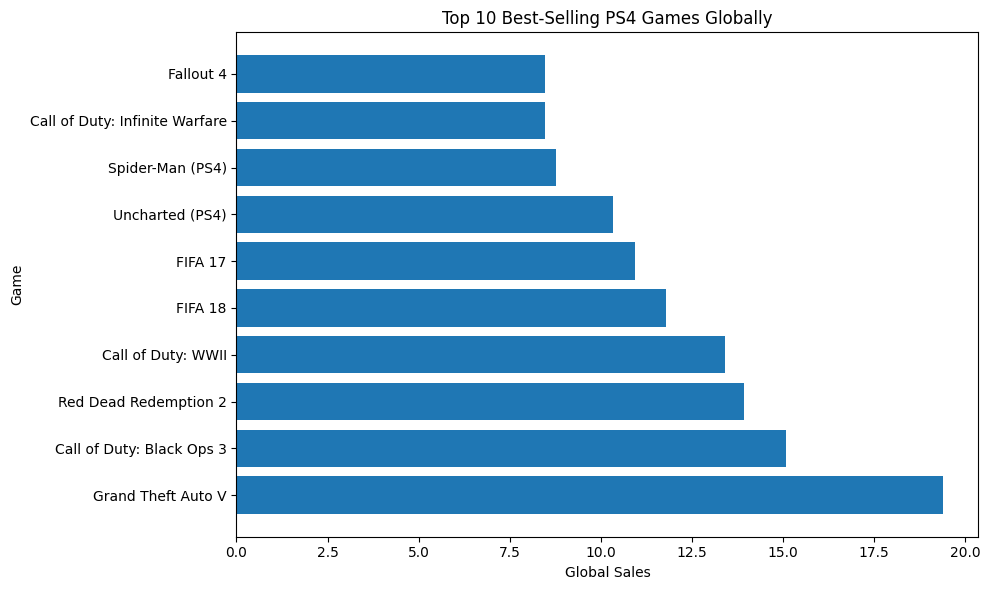

In [28]:
top_10_games = df.nlargest(10, 'Global')


plt.figure(figsize=(10, 6))
plt.barh(top_10_games['Game'], top_10_games['Global'])
plt.xlabel('Global Sales')
plt.ylabel('Game')
plt.title('Top 10 Best-Selling PS4 Games Globally')
plt.tight_layout()
plt.show()

# Correlation between regional sales (heatmap)

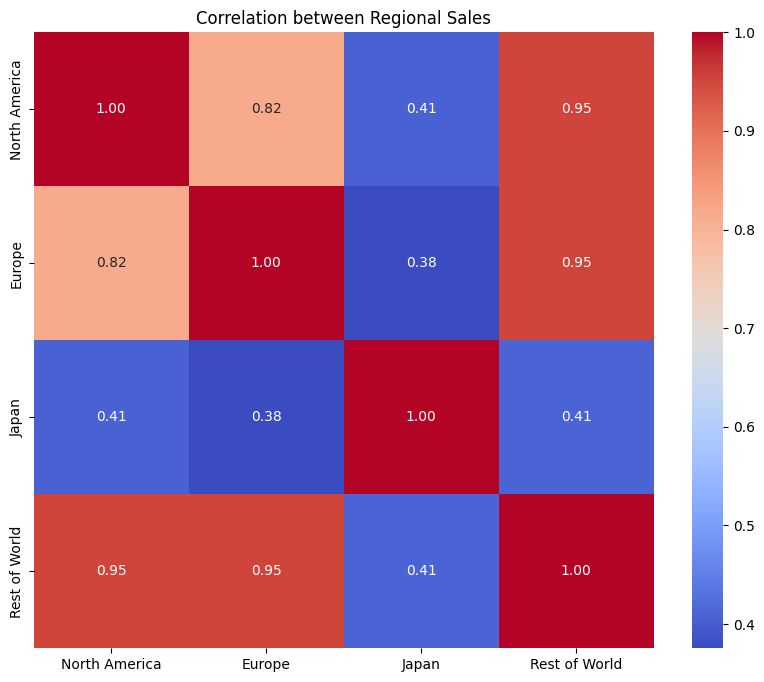

In [29]:
df = df.rename(columns={'NA_Sales': 'North America', 'EU_Sales': 'Europe', 'JP_Sales': 'Japan', 'Other_Sales': 'Rest of World'})


regional_sales = df[['North America', 'Europe', 'Japan', 'Rest of World']]


correlation_matrix = regional_sales.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Regional Sales')
plt.show()

# Contribution of each genre to regional sales (stacked bar chart)

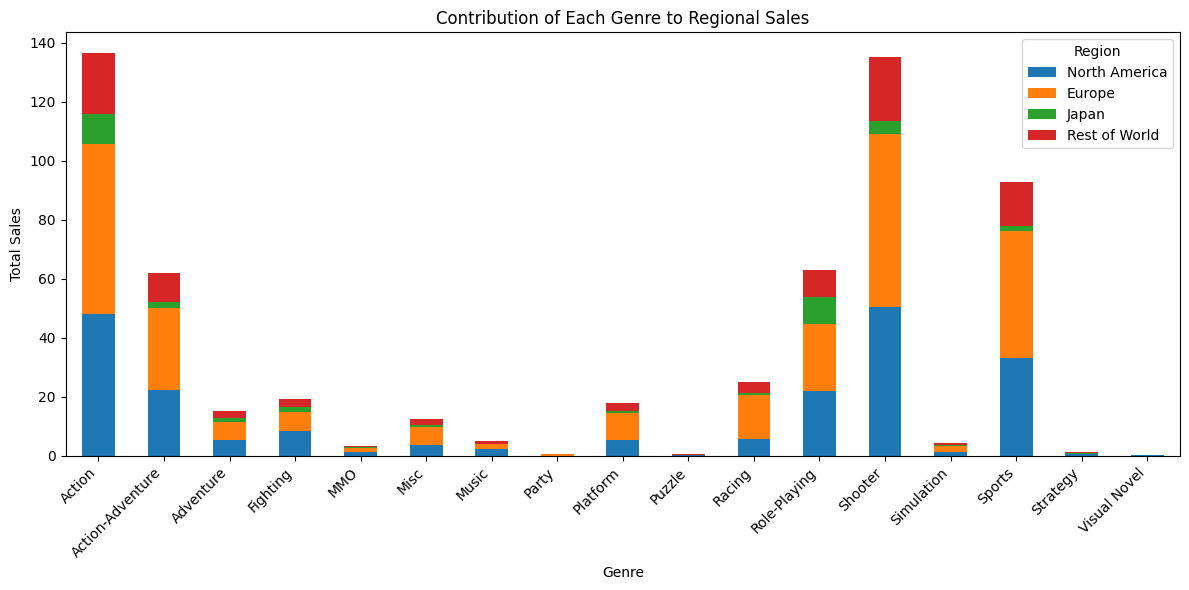

In [30]:
genre_regional_sales = df.groupby('Genre')[['North America', 'Europe', 'Japan', 'Rest of World']].sum()


genre_regional_sales.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Contribution of Each Genre to Regional Sales')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region')
plt.tight_layout()
plt.show()